-- Notebook hecho por Felipe Serrano Salinas --
# Este notebook será para responder las siguentes preguntas.

-  ##### ¿Cómo se vieron afectados los puntajes durante la pandemia y el estallido social, considerando factores como la dificultad del acceso a las clases presenciales?
-  ##### ¿Se puede establecer un perfil de estudiante que permita explicar su desempeño en la prueba de admisión, considerando variables como el promedio de notas de enseñanza media, la situación de egreso y otras condiciones académicas o socioeconómicas?

##### Las librerias necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

##### Las preguntas serán respondidas en base el dataset hecho en la Entrega inicial del proyecto. (Guardada en la carpeta 'data').

In [2]:
df = pd.read_parquet("../data/datos_procesados.parquet")

df.head()

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,426.0,None,6.3,682.0,2004,NaN,<NA>,54.47,PSU
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,<NA>,None,5.3,481.0,2004,NaN,<NA>,55.82,PSU
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,396.0,None,4.8,376.0,2004,NaN,<NA>,49.0,PSU
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,<NA>,None,4.8,373.0,2004,NaN,<NA>,49.41,PSU
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,<NA>,None,5.4,501.0,2004,NaN,<NA>,50.29,PSU


Creare una copia del df original para cada pregunta

In [3]:
df_p1 = df.copy()
df_p2 = df.copy()

##### Empezemos a responder la pregunta número uno.

- ¿Cómo se vieron afectados los puntajes durante la pandemia y el estallido social, considerando factores como la dificultad del acceso a las clases presenciales?

##### Para responder esta pregunta debemos tener claro cuales son los periodos de tiempo de cada situacion social.

- Normal: Pre-estallido y pre-pandemia (procesos 2018–2019).
- Estallido/Inicio Pandemia: (procesos 2020–2021).
- Pandemia Severa/Post-Estallido: (procesos 2022–2023).
- Post-Pandemia/PAES: (procesos 2024–2025).

Creare una columna [`periodo_social`] para poder identificar facilmente estos periodos de tiempo.

In [4]:
df_p1.loc[df["year_proceso"].isin([2018, 2019]), "periodo_social"] = "Normal"  #2017 - 2018
df_p1.loc[df["year_proceso"].isin([2020, 2021]), "periodo_social"] = "Estallido/Inicio Pandemia" #2019 - 2020
df_p1.loc[df["year_proceso"].isin([2022, 2023]), "periodo_social"] = "Pandemia Severa/Post-Estallido" #2021 - 2022
df_p1.loc[df["year_proceso"].isin([2024, 2025]), "periodo_social"] = "Post-Pandemia/PAES" #2023 - 2024

df_p1["periodo_social"].value_counts()

periodo_social
Post-Pandemia/PAES                617581
Normal                            552785
Pandemia Severa/Post-Estallido    548056
Estallido/Inicio Pandemia         530909
Name: count, dtype: int64

In [5]:
df_p1.columns

Index(['id_estudiante', 'id_colegio_rbd', 'dependencia_colegio',
       'rama_educacional', 'situacion_egreso', 'cod_region', 'cod_comuna',
       'puntaje_lectora', 'puntaje_m1', 'puntaje_historia', 'puntaje_ciencias',
       'tipo_ciencia', 'promedio_notas', 'puntaje_nem', 'year_proceso',
       'puntaje_ranking', 'puntaje_m2', '%_de_logro_obligatorias', 'prueba',
       'periodo_social'],
      dtype='object')

La siguente función sirve para estandarizar los datos y poder comparar los puntajes entre las distintas pruebas (PSU, PDT, PAES).

Esta manera de estandarizar se calcula: (Puntaje_Prueba - Promedio_Prueba) / (Desviación_estandar)

In [6]:
def estandarizar(df, columna_puntaje):
    df_temp = df.groupby('year_proceso')[columna_puntaje].agg(mean=('mean'), std=('std'))
    df_merged = df.merge(df_temp, on='year_proceso', how='left')
    df_merged[f'estandar_{columna_puntaje}'] = (df_merged[columna_puntaje] - df_merged['mean']) / df_merged['std']
    df_merged = df_merged.drop(columns=['mean', 'std'])
    return df_merged

In [7]:
df_p1 = estandarizar(df_p1, 'puntaje_m1')
df_p1 = estandarizar(df_p1, 'puntaje_m2')
df_p1 = estandarizar(df_p1, 'puntaje_lectora')
df_p1 = estandarizar(df_p1, 'puntaje_ciencias')
df_p1 = estandarizar(df_p1, 'puntaje_historia')

df_p1

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,...,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba,periodo_social,estandar_puntaje_m1,estandar_puntaje_m2,estandar_puntaje_lectora,estandar_puntaje_ciencias,estandar_puntaje_historia
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,...,NaN,<NA>,54.47,PSU,NaN,-0.392555,<NA>,-0.260424,-0.746874,-0.587108
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,...,NaN,<NA>,55.82,PSU,NaN,-0.392555,<NA>,-0.071623,<NA>,0.119588
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,...,NaN,<NA>,49.0,PSU,NaN,-0.529614,<NA>,-0.900707,-1.047548,<NA>
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,...,NaN,<NA>,49.41,PSU,NaN,-0.118438,<NA>,-1.21264,<NA>,-0.91256
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,...,NaN,<NA>,50.29,PSU,NaN,-0.684947,<NA>,-0.580565,<NA>,-0.456927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455232,id_5995599440825,9986.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126.0,<NA>,<NA>,<NA>,...,NaN,<NA>,<NA>,PAES,Post-Pandemia/PAES,<NA>,<NA>,<NA>,<NA>,<NA>
5455233,id_4895488246247,NaN,None,CH - reconocimiento de estudios,Act:Extranjero,NaN,NaN,605.0,700.0,542.0,...,NaN,<NA>,65.25,PAES,Post-Pandemia/PAES,0.505843,<NA>,0.078275,0.129157,0.296264
5455234,id_9866988747313,9140.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13122.0,746.0,589.0,<NA>,...,856.0,362,66.75,PAES,Post-Pandemia/PAES,-0.242587,-0.517674,1.278703,1.510048,<NA>
5455235,id_5866598447255,2733.0,Municipal,CH diurno,Ant:Nacional-Regular,7.0,7301.0,<NA>,<NA>,<NA>,...,631.0,<NA>,<NA>,PAES,Post-Pandemia/PAES,<NA>,<NA>,<NA>,<NA>,<NA>


In [8]:
columnas_z = [
    'estandar_puntaje_lectora', 
    'estandar_puntaje_m1', 
    'estandar_puntaje_m2',
    'estandar_puntaje_historia', 
    'estandar_puntaje_ciencias'
]

df_p1['z_puntaje_general'] = df_p1.loc[:, columnas_z].mean(axis=1)

Ya con los datos estandarizados y con una escala similar, podemos empezar a responder la pregunta

In [9]:
period_order_user = [
    'Normal',
    'Estallido/Inicio Pandemia',
    'Pandemia Severa/Post-Estallido',
    'Post-Pandemia/PAES'
]

#### Grafico Boxplot para ver la distribución de los puntajes Estandares de las pruebas.

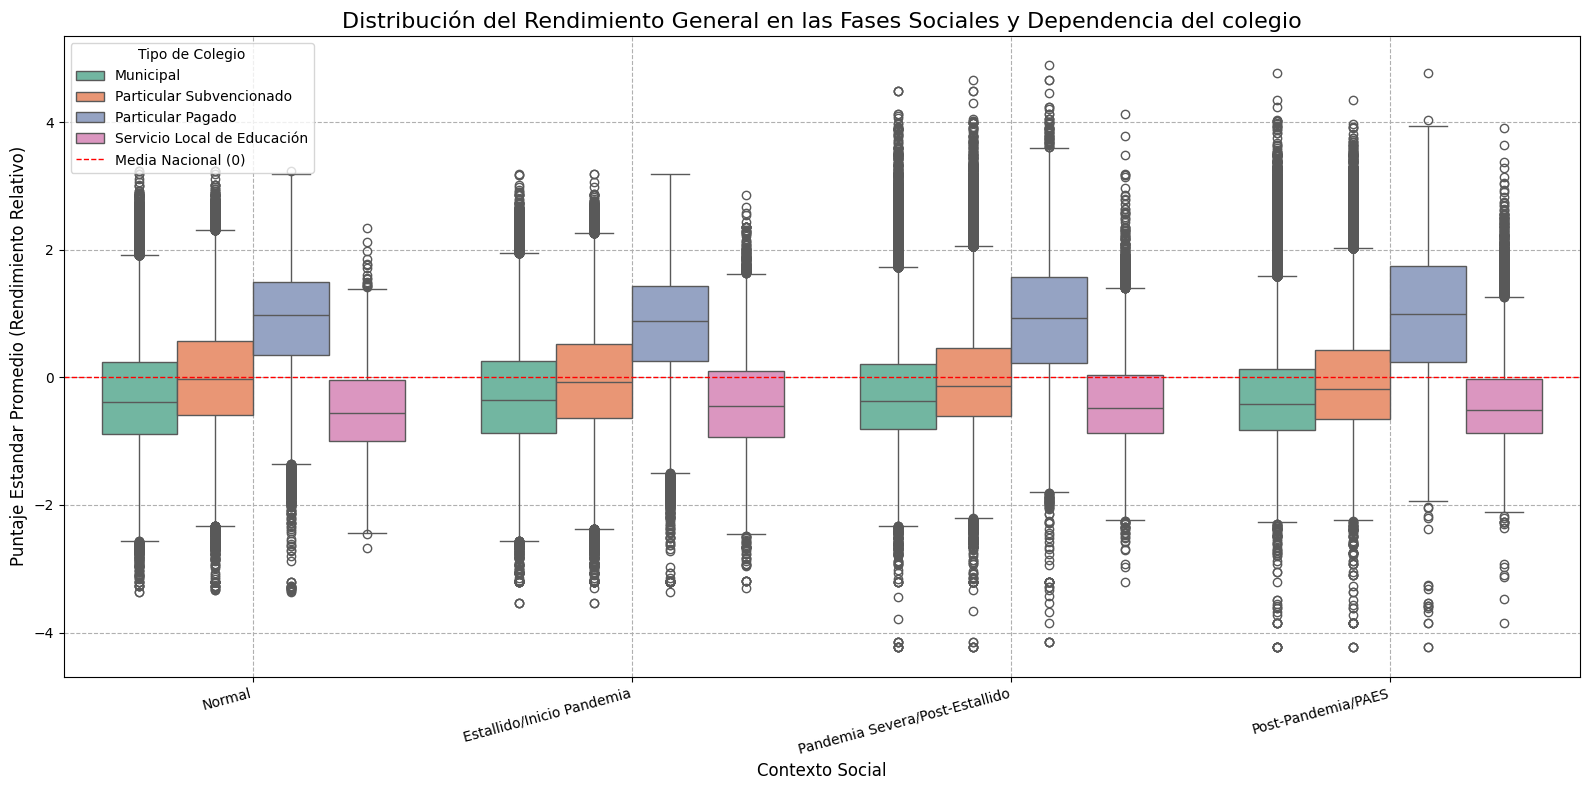

In [10]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df_p1,
    x='periodo_social',
    y='z_puntaje_general',
    hue='dependencia_colegio',
    order=period_order_user,
    palette='Set2'
)

plt.title('Distribución del Rendimiento General en las Fases Sociales y Dependencia del colegio', fontsize=16)
plt.xlabel('Contexto Social', fontsize=12)
plt.ylabel('Puntaje Estandar Promedio (Rendimiento Relativo)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Media Nacional (0)')
plt.legend(title='Tipo de Colegio', loc='upper left')
plt.grid(linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

#### Este grafico nos dice mucho, primero podemos ver una diferencia entre los dos primeros graficos y los otros dos. En esta diferencia se logra ver, una ampliación de los quartiles, los maximos y minimos. Esto nos quiere decir que ese grupo de alumnos que fueron saliendo de los procesos de post estallido y pandemia, tienen sus promedios de las pruebas más dispersas y desiguales. Esto tiene sentido, ya que esos alumnos que estan por debajo del primer quartil, se debe a la falta de acceso al internet. O por el otro lado tenemos a los alumnos que tenian este acceso y lo aprovecharon bien teniendo un buen desempeño en las pruebas. Esto nos lleva al otro tema, la dependencia del colegio nos da la idea del perfil del usuario es decir clasificarlos economicamente. La familia de un alumno de un colegio municipal no tiene las misma economia que la de una del colegio particular pagado. Esto nos hace sentido ya que en el grafico se logra ver que en los cuatro peridodos la dependencia de los colegios Particulares Pagados es la mayor. Además que es el unico que va aumentando notoriamente a travez de los años, las otras tres dependencias bajaron o se mantuvieron respecto al periodo `Normal`.

#### Ahora un grafico de violin para ver la densidad de los datos.

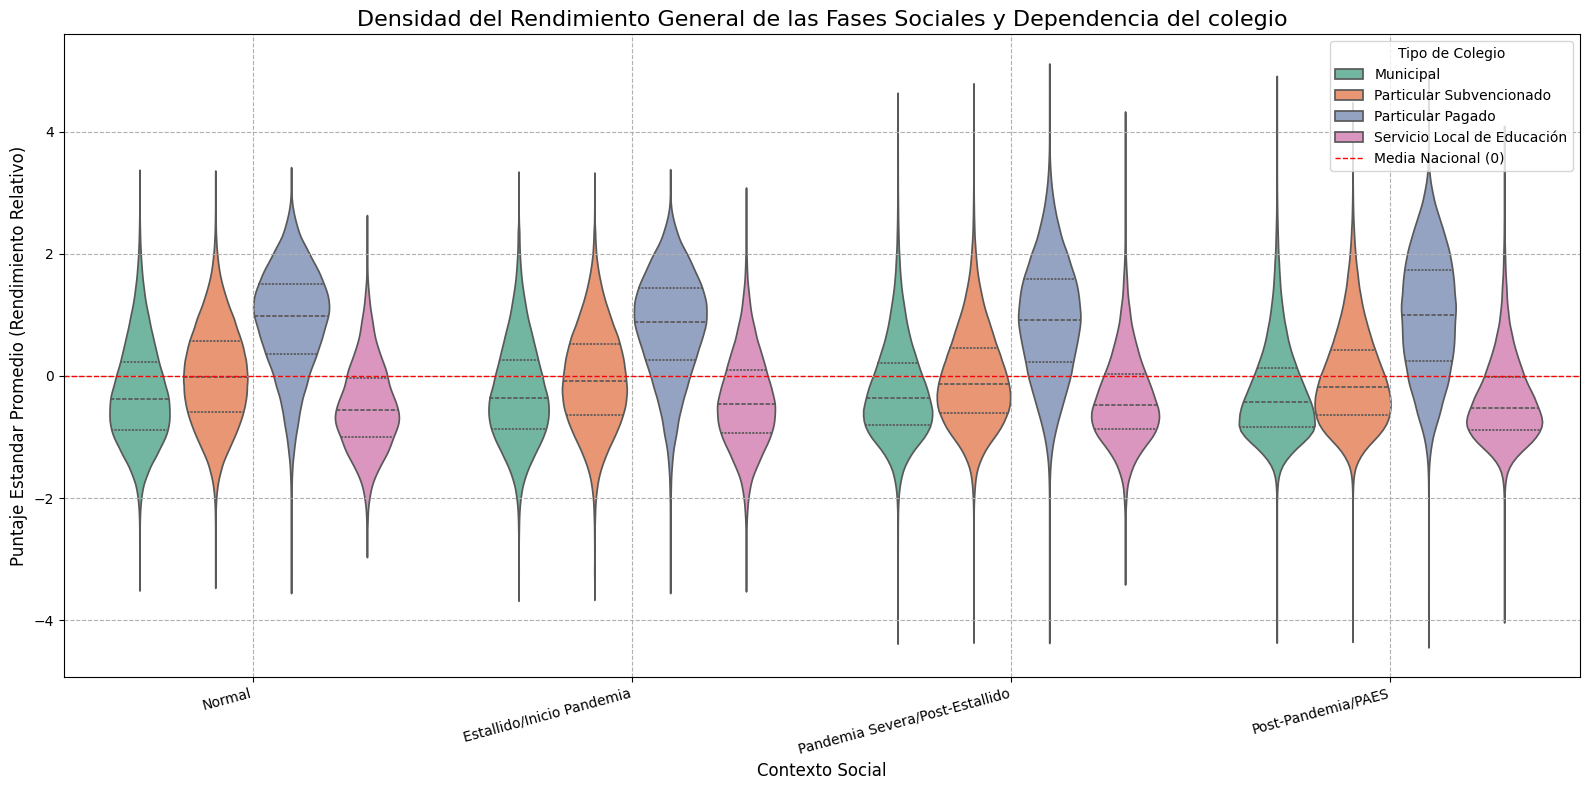

In [11]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    data=df_p1,
    x='periodo_social',
    y='z_puntaje_general',
    hue='dependencia_colegio',
    order=period_order_user,
    palette='Set2',
    split=False,
    inner='quartile'
)

plt.title('Densidad del Rendimiento General de las Fases Sociales y Dependencia del colegio', fontsize=16)
plt.xlabel('Contexto Social', fontsize=12)
plt.ylabel('Puntaje Estandar Promedio (Rendimiento Relativo)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Media Nacional (0)')
plt.legend(title='Tipo de Colegio', loc='upper right')
plt.grid(linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

#### Este grafico de violin complementa al anterior, ya que se puede ver de mejor manera la distribución y en que parte se concentran la mayor cantidad de alumnos. Como por ejemplo se logra ver que en los dos ultimos periodos los graficos bajaron el lugar donde se concentraban la mayor cantidad de alumnos y el unico que  fue el tipo Particular Pagado.

#### Y por ultimo un grafico de barras para poder visualizar el promedio de los puntajes estandarizados.

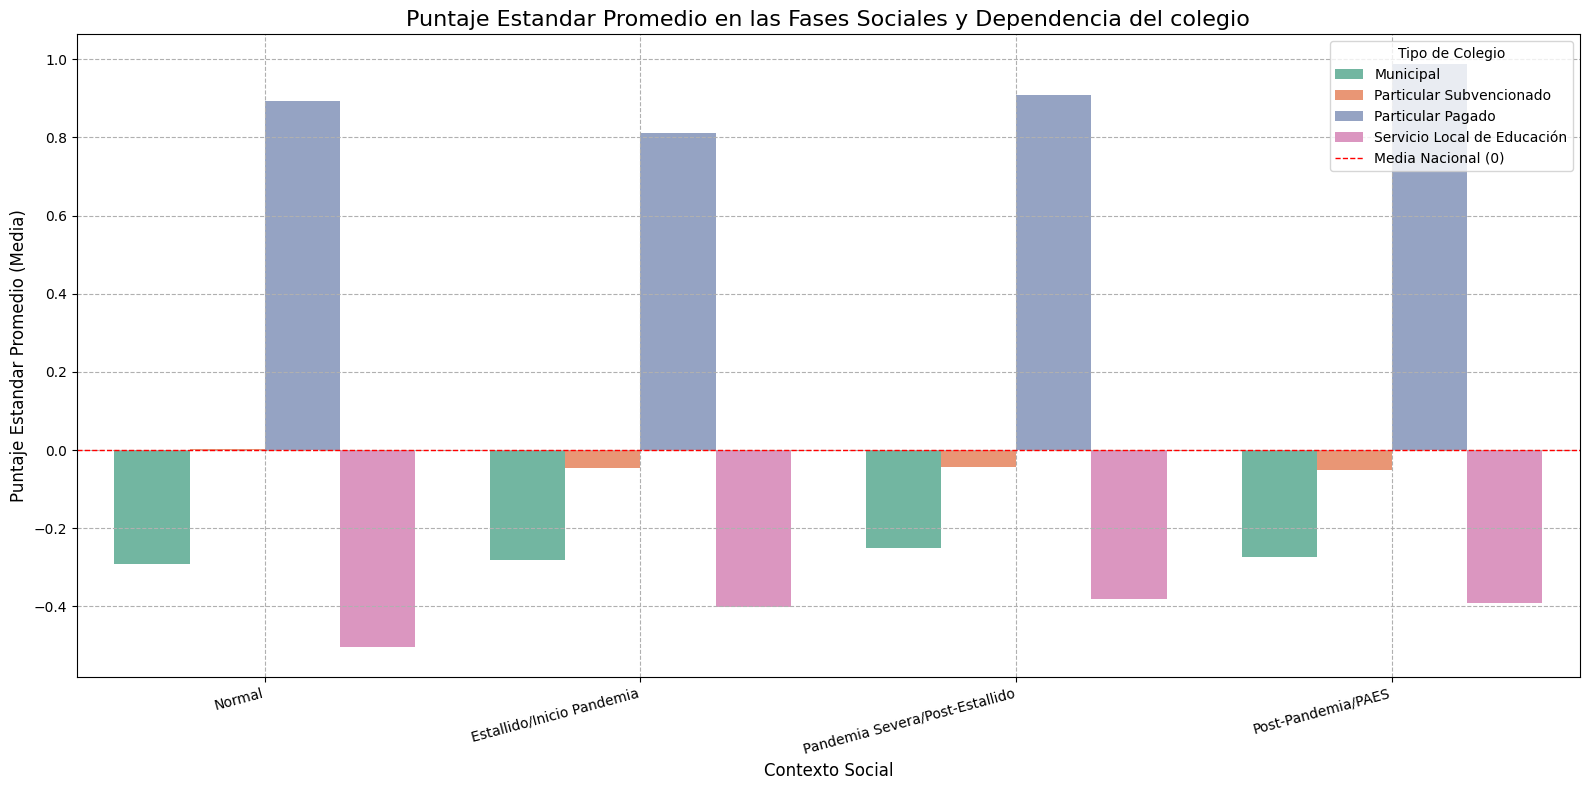

In [12]:
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_p1,
    x='periodo_social',
    y='z_puntaje_general',
    hue='dependencia_colegio',
    order=period_order_user,
    palette='Set2',
    errorbar=None
)

plt.title('Puntaje Estandar Promedio en las Fases Sociales y Dependencia del colegio', fontsize=16)
plt.xlabel('Contexto Social', fontsize=12)
plt.ylabel('Puntaje Estandar Promedio (Media)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Media Nacional (0)')
plt.legend(title='Tipo de Colegio', loc='upper right')
plt.grid(linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

#### Este grafico al igual que el anterior, complementa al boxplot. Y lo que se puede observar esque los colegios de tipo `Municipal` se mantuvieron en el promedio que tuvieron en el periodo `Normal`. Los colegios de tipo `Particular Subvencionado` bajaron su promedio, pero no fue una caida abrupta. En cambio los colegios del tipo `Particular Pagado` se nota ese aumento del promedio y los colegios del tipo `Servicio Local de Educación` tambien aumentaron su promedio, pero este se ecuentra bajo el promedio nacional.

### En conclusion los puntajes si se vieron afectados gracias al estallido y la pandemia. Se podria decir que fueron afectados para bien ya que aunque haya una gran dispersion de los puntajes más bajos, tambien la hay para los puntajes más alto que es lo que se busca. Además de que los promedios aumentaron o se mantuvieron. 

## Ahora pasemos con la segunda pregunta.

- ¿Se puede establecer un perfil de estudiante que permita explicar su desempeño en la prueba de admisión, considerando variables como el promedio de notas de enseñanza media, la situación de egreso y otras condiciones académicas o socioeconómicas?

### Para responder esta pregunta podemos establecer que el perfil del estudiante va a depender del porcecntaje de logro de las pruebas obligatorias (Comprension Lectora y Competencia Matematica).

In [13]:
df_p2

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,426.0,None,6.30,682.0,2004,NaN,<NA>,54.47,PSU
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,<NA>,None,5.30,481.0,2004,NaN,<NA>,55.82,PSU
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,396.0,None,4.80,376.0,2004,NaN,<NA>,49.0,PSU
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,<NA>,None,4.80,373.0,2004,NaN,<NA>,49.41,PSU
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,<NA>,None,5.40,501.0,2004,NaN,<NA>,50.29,PSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455232,id_5995599440825,9986.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126.0,<NA>,<NA>,<NA>,<NA>,None,NaN,NaN,2025,NaN,<NA>,<NA>,PAES
5455233,id_4895488246247,NaN,None,CH - reconocimiento de estudios,Act:Extranjero,NaN,NaN,605.0,700.0,542.0,502.0,BIO,NaN,NaN,2025,NaN,<NA>,65.25,PAES
5455234,id_9866988747313,9140.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13122.0,746.0,589.0,<NA>,665.0,BIO,6.28,793.0,2025,856.0,362,66.75,PAES
5455235,id_5866598447255,2733.0,Municipal,CH diurno,Ant:Nacional-Regular,7.0,7301.0,<NA>,<NA>,<NA>,<NA>,None,5.68,622.0,2025,631.0,<NA>,<NA>,PAES


Las columnas categoricas las transformamos en columnas binarias

In [14]:
categorical_cols = ['dependencia_colegio', 'situacion_egreso']
df_p2 = pd.get_dummies(df_p2, columns=categorical_cols)

Calculamos la regresion y su R²

In [20]:
Y = df_p2['%_de_logro_obligatorias'] 

PUNTAJES_A_EXCLUIR = [
    '%_de_logro_obligatorias', 'puntaje_lectora', 'puntaje_m1', 
    'puntaje_historia', 'puntaje_ciencias', 'puntaje_m2', 
    'puntaje_nem', 'puntaje_ranking', 'year_proceso', 
    'cod_region', 'cod_comuna', 'id_estudiante', 'id_colegio_rbd'
]

X_cols = [col for col in df_p2.columns if col not in PUNTAJES_A_EXCLUIR and df_p2[col].dtype != object]
X = df_p2[X_cols]

df_combined = pd.concat([X, Y], axis=1)
df_clean = df_combined.dropna(how='any')

X_clean = df_clean[X_cols]
Y_clean = df_clean['%_de_logro_obligatorias']


X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.3, random_state=42)

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

score_r2 = modelo_regresion.score(X_test, Y_test)

coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_regresion.coef_.flatten()
})

coeficientes['Importancia_Absoluta'] = np.abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values(by='Importancia_Absoluta', ascending=False)

print(f"\n--- R^2 Score del modelo en datos de prueba: {score_r2:.4f}")


--- R^2 Score del modelo en datos de prueba: 0.4018


C:\Users\UsuarioCompuElite\AppData\Local\Temp\ipykernel_15272\2815659586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


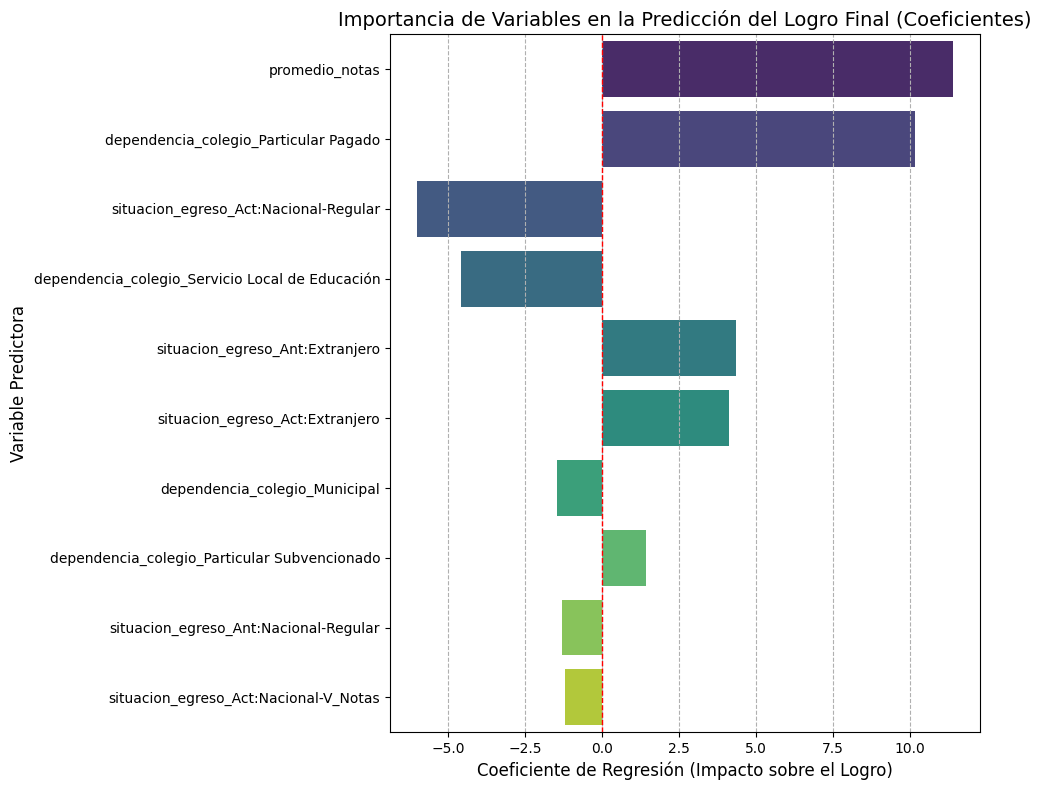

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=coeficientes.head(10),
    y='Variable',
    x='Coeficiente',
    palette='viridis'
)

plt.title('Importancia de Variables en la Predicción del Logro Final (Coeficientes)', fontsize=14)
plt.xlabel('Coeficiente de Regresión (Impacto sobre el Logro)', fontsize=12)
plt.ylabel('Variable Predictora', fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

- ### En base los resultados, si se puede establecer un perfil del estudiante para entender su desempeño en las pruebas. Estas principalmente se componen en sus notas de la estapa escolar, la oportunidad institucionalidad y la situacion temporal de egreso. Siendo lo que más afecta a la hora de ver el exito en las pruebas, son las notas de enseñanza media, mientras más altas hay más posibilidades de tener un buen porcentaje de logro. Por otra parte que tambien afecta, es el pertenecer a ciertas familias educativas, por ejemplo al ser parte de un colegio Particular pagado, puede subir 10 puntos porcentuales al porcentaje de logro, en cambio al ser de un colegio Servicio Local de Educación puede ocasionar una disminución del porcentaje de logro. Esto no quiere decir que todos los alumnos tengan estos comportamientos, si no que este puede ser un factor muy influyente a la hora de rendir la prueba, por la poca preparacion previa o la falta de recursos. 

##### Estas predicciones estan hechas en base a un R² = 0.4018, el restante son factores no incluidos o no presentados en el dataset, como la region, ingreso familiar, calidad de los docentes.